# Breadth First Search - *Uninformed Search*

### Overview
This notebook implements Breadth First Search (BFS) an uninformed search algorithm. The goal is to find a path from the start to the finish in a maze represented as a 2D array.
### Breadth First Search
- Breadth First Search (BFS) explores all nodes at each depth, before expanding nodes at a layer under.  This means unlike DFS, the node in the frontier are explored using a First In First Out (FIFO) queue, where the *oldest* discovered node is expanded first.
- This implementation of BFS will include `path-cost` to return an optimal solution.
### Search Strategy
- Initializes the frontier using the initial state of the problem. Explore set = None.
- Take the *first* node in the queue and removes it from the frontier. 
- Check if the node is goal state. 
- if the frontier is empty break. 
- if not? FIFO pop() (oldest) from frontier.
- Add the node to explored set
- For every neighbour of the current node
- Loop until frontier is empty or goal is found. 

### Steps:
1. **Convert the maze into a 2D Array**: Load maze data and convert it to integer format for processing.
2. **Implementing BFS**: Use a stack class with FIFO queue to manage the nodes during the search process.
3. **Visualizing the Path**: Use matplotlib to illustrate the start, the path, and the goal within the maze.




# Implementing Breadth First Search

In [2]:
# import the modules creates
# These come from the source_code file
import matplotlib.pyplot as plt
import numpy as np
from source_code.Helpers import string_to_int_array

# Load and Prepare Maze Data
1. Load the maze data and convert it to a usable format.
2. Find the starting state (2)
3. Find the end state (9) 

In [3]:
# take the string maze, load it to text with numpy
# Convert string type to int
maze_array_string = np.loadtxt('/Users/calebcougle/PycharmProjects/CAI104_COUGLE_A3/Mazes/a3maze.txt', dtype='str', delimiter=",")
maze = string_to_int_array(maze_array_string)

# The output is a 2D numpy array 
print(maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 9 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [4]:
def find_start(maze):
    for i, row in enumerate(maze):
        for j, value in enumerate(row):
            if value == 2:  # Check for integer 2
                return (i, j)
    return None

def find_goal(maze):
    for i, row in enumerate(maze):
        for j, value in enumerate(row):
            if value == 9:  # Check for integer 2
                return (i, j)
    return None

In [5]:
goal_point = find_goal(maze)
start_point = find_start(maze)
print("Start point:",start_point,"\nGoal:",find_goal(maze))

Start point: (2, 2) 
Goal: (4, 20)


# FIFO Queue Class Definition
- The data queue class from DFS can be adapted for BFS; *however*, it functions as a LIFO with the `FIFO_Pop()` method.
- The stack holds the frontier or 'discovered' nodes pending exploration.
- The class methods labeled FIFO implement the BFS search strategy, `First in First Out`, returning the oldest node from the queue
(Russell & Norvig, 2016)

In [26]:
# Code based on (Andrews, 2023). 
class FIFO:

    # constructor method
    def __init__(self):
        self.items = []

    # check if stack is empty
    def is_empty(self):
        return not self.items #<-- so as not to return bool
    
    def append(self,item):
        self.items.append(item)
    
    # add items to the list
    def push(self, item):
        self.items.append(item)

    # removes the last item and returns the value
    def pop(self):
        return self.items.pop()

    # shows list item in list
    def peek(self):
        return self.items[-1]

    # size of list
    def size(self):
        return len(self.items)

    def fifo_pop(self):
        return self.items.pop(0)

    # turns obj into string
    def __str__(self):
        return str(self.items)

# Breadth First Search (BFS) Implementation

- **Function Definition**: The `bfs()` function implements the breadth-first search algorithm, utilizing methods from the `fifo` class to manage nodes during the search.
- **Initial State**: The starting node (`start`) is pushed onto the stack, as identified in previous functions.
- **Predecessors Dictionary**: The `predecessors{}` dictionary functions similarly to an explored list; it records node traversal and returns the solution path when the goal is found.
- **Current Node**: The `current_cell`, analogous to the current node, is the most recently added node on the stack, retrieved using the `fifo.pop(0)` method.
- **Expanding Frontier**: The frontier expands as the nested `for` loop iterates over directions, pushing neighbors onto the stack. Neighbors are discovered by adding the directional offset to the current node's array index. *Example:* Turn Right = `current_column + 1`.
- **Dead End Handling**: The `is_legal_pos()` function checks for dead ends, walls, and maze boundaries, ensuring movements are within the permissible range.
- **Goal Check & Solution Path**: If the current node is the goal, the `get_path()` function is invoked to backtrack through the `predecessors` dictionary and construct the path from the start to the goal.


In [55]:
# Import necessary functions from the helpers module
from Helpers import get_path, is_legal_pos, offsets

# Code based on (Andrews, 2023)
def bfs(board, start, goal):
    queue = FIFO()
    queue.append(start)
    visited = set()
    full_path = []

    while queue:
        print("full path", full_path)
        current = queue.fifo_pop()
        full_path.append(current)
        if current == goal:
            return full_path
        for direction in ["up", "right", "down", "left"]:
            row_offset, col_offset = offsets[direction]
            neighbour = (current[0] + row_offset, current[1] + col_offset)
            if is_legal_pos(board, neighbour) and neighbour not in visited:
                queue.append(neighbour)
                visited.add(neighbour)
    return  full_path

In [56]:
# Run the DFS with the loaded maze, startpoint and goal point
path = bfs(maze, start_point, goal_point)
print(path)


full path []
full path [(2, 2)]
full path [(2, 2), (1, 2)]
full path [(2, 2), (1, 2), (2, 3)]
full path [(2, 2), (1, 2), (2, 3), (3, 2)]
full path [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1)]
full path [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3)]
full path [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (2, 2)]
full path [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (2, 2), (1, 1)]
full path [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (2, 2), (1, 1), (2, 4)]
full path [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (2, 2), (1, 1), (2, 4), (3, 3)]
full path [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (2, 2), (1, 1), (2, 4), (3, 3), (4, 2)]
full path [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (2, 2), (1, 1), (2, 4), (3, 3), (4, 2), (3, 1)]
full path [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (2, 2), (1, 1), (2, 4), (3, 3), (4, 2), (3, 1), (1, 4)]
full path [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (2, 2), (1, 1), (2, 4), (3, 3), (4, 2), (3, 1), (1, 4), (

# Visualize the Path
- Run the BFS algorithm and visualize the results using MatplotLip.
- The function `update_maze_with_path()` plots the path on the maze as 4 

In [48]:
from matplotlib.colors import ListedColormap, Normalize

def plot_maze(maze, title="Maze"):
    colors = ['#F5F5F5', '#32424A', '#801515', '#27566B', '#55AA55']  # Background, walls, start, end, path
    cmap = ListedColormap(colors)
    norm = Normalize(vmin=0, vmax=len(colors) - 1)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(maze, cmap=cmap, norm=norm)
    ax.set_title(title)
    ax.set_axis_off()
    plt.show()


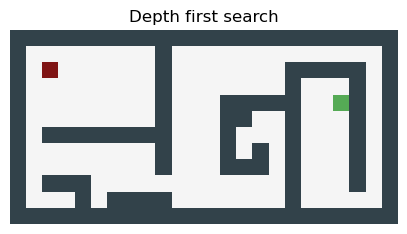

In [49]:
plot_maze(maze, "Depth first search")

In [50]:
def update_maze_with_path(maze, path):
    for position in path:
        maze[position[0], position[1]] = 4  # Mark path positions with 4
    return maze

In [51]:
def plot_path(maze, start, goal, path):
    if start:
        # path = dfs(maze, start, goal)  # Ensure 'maze' is used, which should be the integer array
        if path:
            updated_maze = update_maze_with_path(maze.copy(), path)
            plot_maze(updated_maze, "Breadth first search: Solution path")
            print("Path:", path)
        else:
            print("No path found.")
    else:
        print("No start point found.")

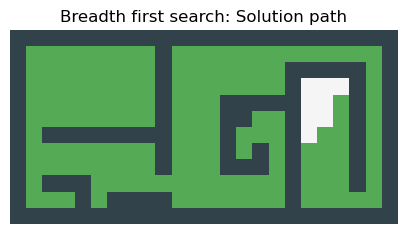

Path: [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (2, 2), (1, 1), (2, 4), (3, 3), (4, 2), (3, 1), (1, 4), (2, 5), (3, 4), (4, 3), (5, 2), (4, 1), (1, 5), (2, 6), (3, 5), (4, 4), (5, 3), (5, 1), (1, 6), (2, 7), (3, 6), (4, 5), (5, 4), (6, 1), (1, 7), (2, 8), (3, 7), (4, 6), (5, 5), (7, 1), (1, 8), (3, 8), (4, 7), (5, 6), (7, 2), (8, 1), (4, 8), (5, 7), (7, 3), (8, 2), (9, 1), (5, 8), (7, 4), (8, 3), (10, 1), (7, 5), (8, 4), (10, 2), (7, 6), (8, 5), (10, 3), (7, 7), (8, 6), (9, 5), (7, 8), (8, 7), (9, 6), (10, 5), (8, 8), (9, 7), (9, 8), (9, 9), (9, 10), (8, 10), (9, 11), (10, 10), (7, 10), (8, 11), (9, 12), (10, 11), (6, 10), (7, 11), (8, 12), (9, 13), (10, 12), (5, 10), (6, 11), (7, 12), (9, 14), (10, 13), (4, 10), (5, 11), (6, 12), (9, 15), (10, 14), (3, 10), (4, 11), (5, 12), (9, 16), (10, 15), (2, 10), (3, 11), (4, 12), (8, 16), (10, 16), (1, 10), (2, 11), (3, 12), (7, 16), (1, 11), (2, 12), (3, 13), (6, 16), (1, 12), (2, 13), (3, 14), (5, 16), (6, 15), (1, 13), (2, 14), (3, 15

In [52]:
plot_path(maze, start_point, goal_point, path)